## Amazon Product Review Analysis
Objective:
Analyze Amazon product reviews to extract insights, identify patterns, perform sentiment analysis, and provide actionable recommendations for product improvement.



In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.6 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

df = pd.read_csv("redmi.csv", encoding="ISO-8859-1")
df.reset_index(drop=True, inplace=True)
df.index = df.index+1
# Successfully loaded Dataset

#lets Handle missing value
df.isnull().sum()
df


,Review Title,Customer name,Rating,Date,Category,Comments,Useful
1,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
2,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
3,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
4,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
5,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful
...,...,...,...,...,...,...,...
276,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",NaN
277,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,Product is avasome but invoice is note include...,NaN
278,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",NaN
279,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,I love mi,NaN


In [2]:
# to fill null value 
df["Useful"].fillna("No review text",inplace=True)
df.isnull().sum()

C:\Users\smdta\AppData\Local\Temp\ipykernel_31804\975017346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Useful"].fillna("No review text",inplace=True)


Review Title     0
Customer name    0
Rating           0
Date             0
Category         0
Comments         0
Useful           0
dtype: int64

In [3]:
df.drop_duplicates(subset=["Review Title","Customer name"],inplace=True)
df.reset_index(drop=True,inplace=True)
df.index = df.index+1
df

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
1,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
2,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
3,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
4,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
5,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful
...,...,...,...,...,...,...,...
237,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",No review text
238,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,Product is avasome but invoice is note include...,No review text
239,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",No review text
240,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,I love mi,No review text


In [20]:
df["Date"] = pd.to_datetime(df["Date"])
df

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Ratings_no.,Sentiment Score,Sentiment
1,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,2018-10-01,Display,Another Midrange killer Smartphone by Xiaomi\n...,,4.0,-0.6486,Negative
2,vry small size mobile,Raza ji,3.0 out of 5 stars,2018-09-15,Others,All ok but vry small size mobile,7 people found this helpful,3.0,0.0000,Neutral
3,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,2018-09-18,Others,Quite good,7 people found this helpful,3.0,0.0000,Neutral
4,Value for Money,Amazon Customer,5.0 out of 5 stars,2018-09-28,Display,Redmi has always have been the the king of bud...,2 people found this helpful,5.0,0.3400,positive
5,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,2018-09-18,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,2.0,-0.1695,Negative
...,...,...,...,...,...,...,...,...,...,...
237,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,2018-09-19,Others,"I like This Phone, Awesome look and design.\nI...",No review text,5.0,0.2716,positive
238,Mi is best phone,Sunil Soni,4.0 out of 5 stars,2018-09-18,Others,Product is avasome but invoice is note include...,No review text,4.0,0.6369,positive
239,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,2018-09-15,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",No review text,3.0,0.4466,positive
240,Redmi,Mahesh,5.0 out of 5 stars,2018-09-21,Others,I love mi,No review text,5.0,0.0000,Neutral


In [6]:
#Descriptive

df.describe()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
count,241,241,241,241,241,241,241
unique,198,210,5,17,5,214,12
top,Good,Amazon Customer,5.0 out of 5 stars,on 18 September 2018,Others,Good,No review text
freq,14,32,139,23,158,15,163


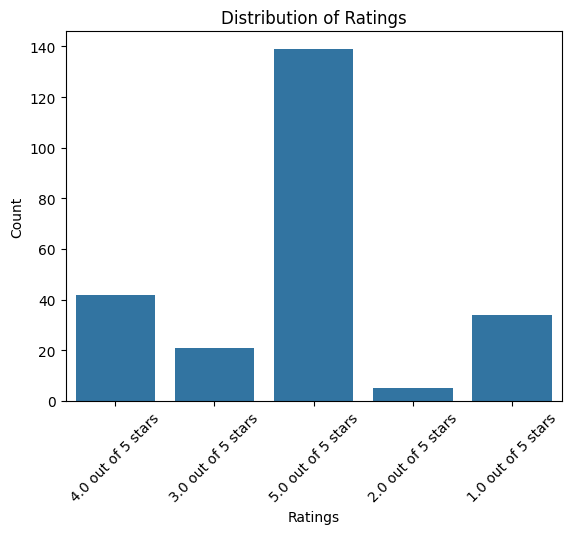

In [4]:
sns.countplot(x="Rating", data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
df.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
1,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
2,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
3,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
4,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
5,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful


In [5]:
avg_ratings = df.groupby("Category")["Rating"]
print(avg_ratings.head()) # so here it is in string format i want to extract first value from this string

# to extarct string 
df["Ratings_no."] = df["Rating"].str.extract(r'(\d+\.\d+)').astype(float)
df

1      4.0 out of 5 stars
2      3.0 out of 5 stars
3      3.0 out of 5 stars
4      5.0 out of 5 stars
5      2.0 out of 5 stars
6      3.0 out of 5 stars
7      4.0 out of 5 stars
8      4.0 out of 5 stars
9      5.0 out of 5 stars
10     5.0 out of 5 stars
12     4.0 out of 5 stars
15     5.0 out of 5 stars
16     5.0 out of 5 stars
18     3.0 out of 5 stars
27     4.0 out of 5 stars
28     2.0 out of 5 stars
29     4.0 out of 5 stars
30     3.0 out of 5 stars
31     4.0 out of 5 stars
34     1.0 out of 5 stars
35     4.0 out of 5 stars
44     5.0 out of 5 stars
51     5.0 out of 5 stars
71     5.0 out of 5 stars
102    5.0 out of 5 stars
Name: Rating, dtype: object


,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Ratings_no.
1,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,4.0
2,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,3.0
3,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,3.0
4,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,5.0
5,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,2.0
...,...,...,...,...,...,...,...,...
237,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",No review text,5.0
238,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,Product is avasome but invoice is note include...,No review text,4.0
239,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",No review text,3.0
240,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,I love mi,No review text,5.0


In [22]:
df.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Ratings_no.
1,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,4.0
2,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,3.0
3,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,3.0
4,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,5.0
5,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,2.0


In [26]:
avg_rat = df.groupby("Category")["Ratings_no."].mean().sort_values(ascending=False)
avg_rat

Category
Delivery    4.833333
Others      4.202532
Display     3.931034
Battery     3.913043
Camera      2.920000
Name: Ratings_no., dtype: float64

## So Delivery fo highest ratings

In [27]:
df.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Ratings_no.
1,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,4.0
2,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,3.0
3,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,3.0
4,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,5.0
5,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,2.0


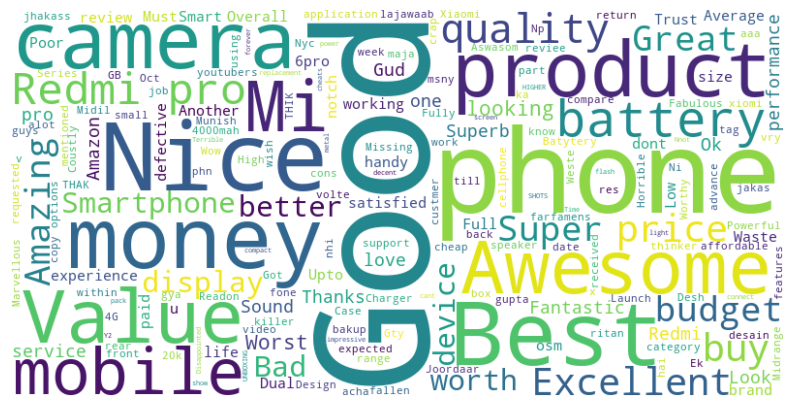

In [7]:
# Combine all reviews into a single string
text = ' '.join(df['Review Title'])

# Generate Word Cloud
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smdta\AppData\Roaming\nltk_data...


True

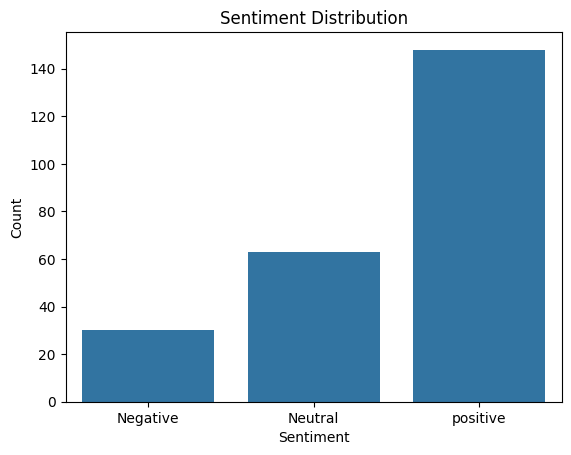

In [12]:
# sentimental analyser

sia = SentimentIntensityAnalyzer()
df["Sentiment Score"] = df["Review Title"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["Sentiment"] = df["Sentiment Score"].apply(lambda x: "positive" if x>0 else ("Negative" if x<0 else "Neutral"))

# sentiment count


sns.countplot(x="Sentiment",data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [13]:
df.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Ratings_no.,Sentiment Score,Sentiment
1,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,4.0,-0.6486,Negative
2,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,3.0,0.0000,Neutral
3,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,3.0,0.0000,Neutral
4,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,5.0,0.3400,positive
5,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,2.0,-0.1695,Negative


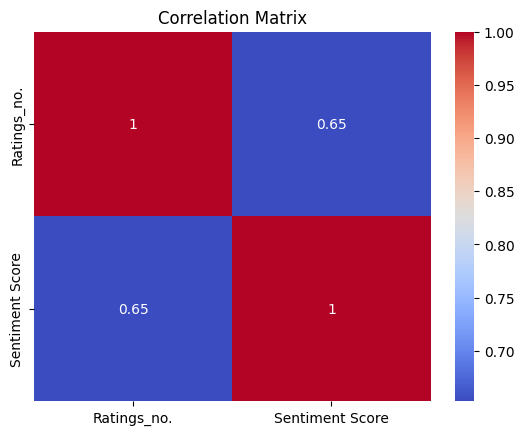

In [17]:
# find correlation between rating and sentiment score

cor = df[["Ratings_no.","Sentiment Score"]].corr()
sns.heatmap(cor,annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [21]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\smdta\AppData\Local\Temp\ipykernel_31804\948101652.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rating = df.resample("M",on="Date")["Ratings_no."].mean()


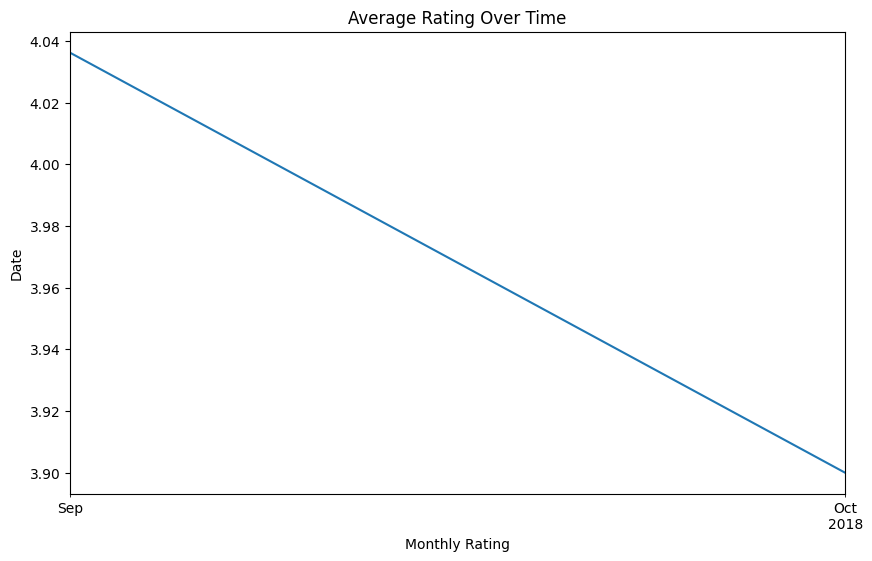

In [22]:
monthly_avg_rating = df.resample("M",on="Date")["Ratings_no."].mean()

monthly_avg_rating.plot(figsize=(10,6))
plt.title("Average Rating Over Time")
plt.xlabel("Monthly Rating")
plt.ylabel("Date")
plt.show()


In [24]:
monthly_avg_rating

Date
2018-09-30    4.036199
2018-10-31    3.900000
Freq: ME, Name: Ratings_no., dtype: float64